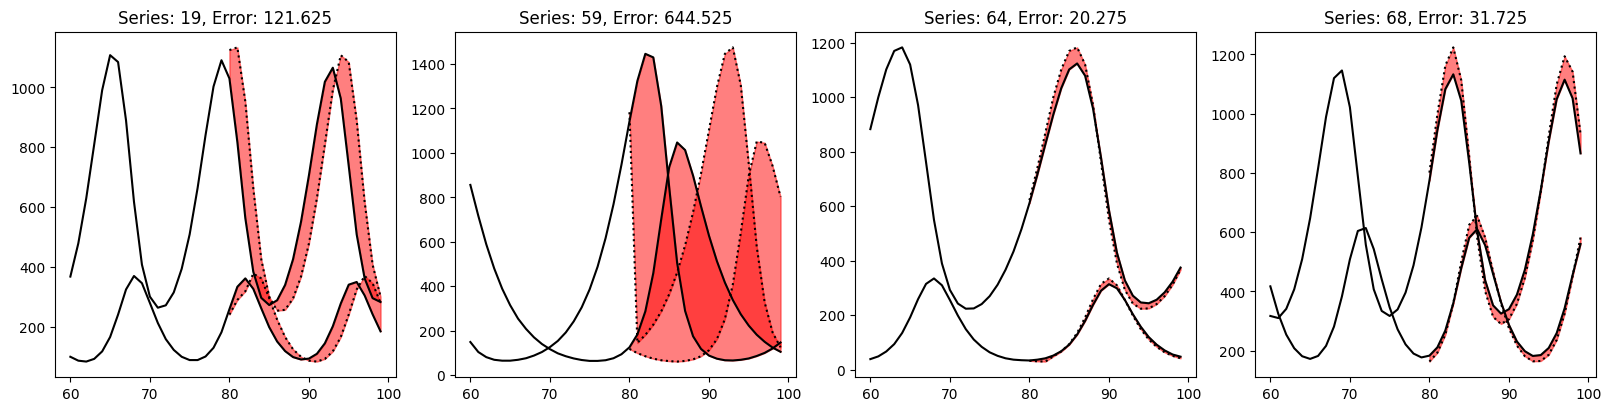

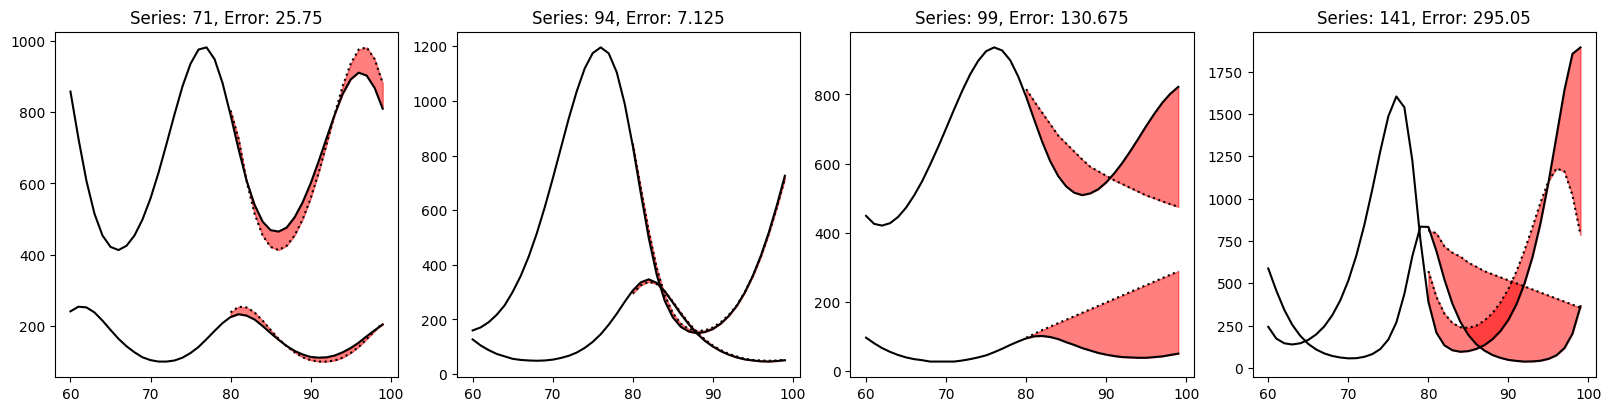

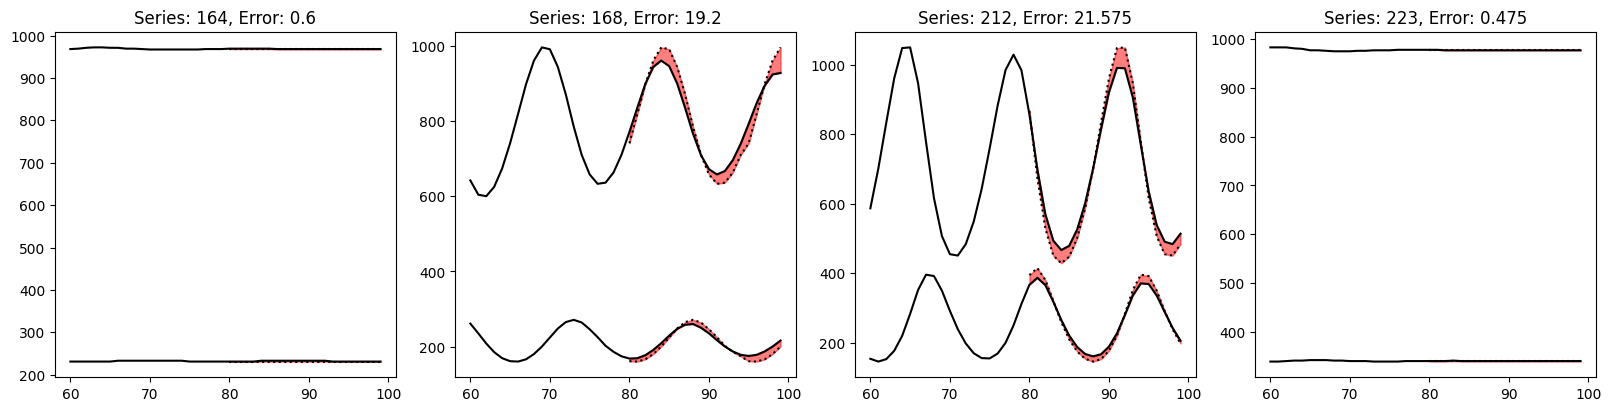

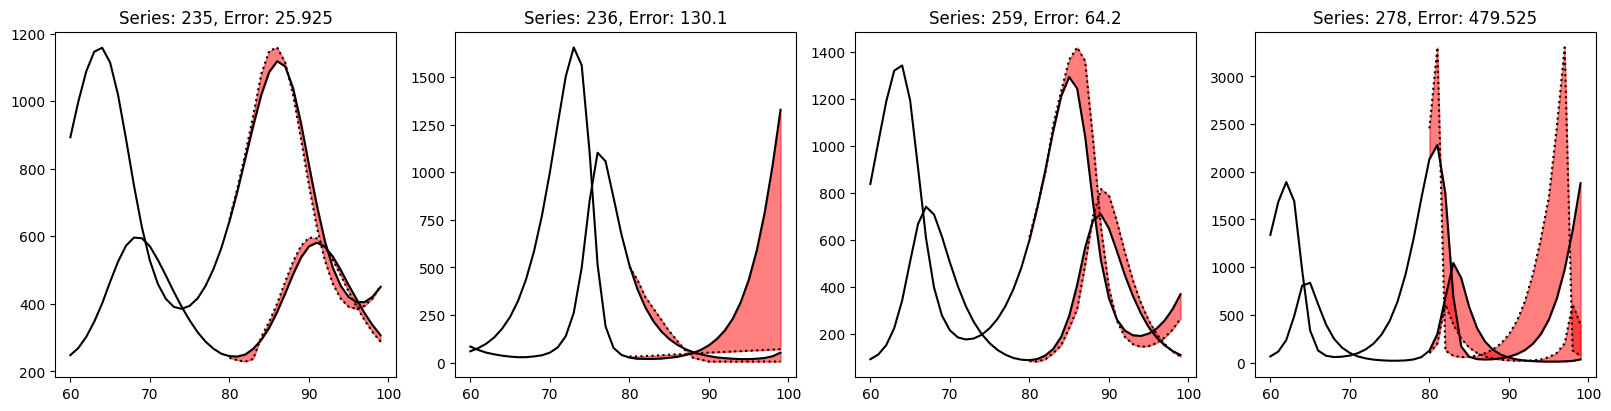

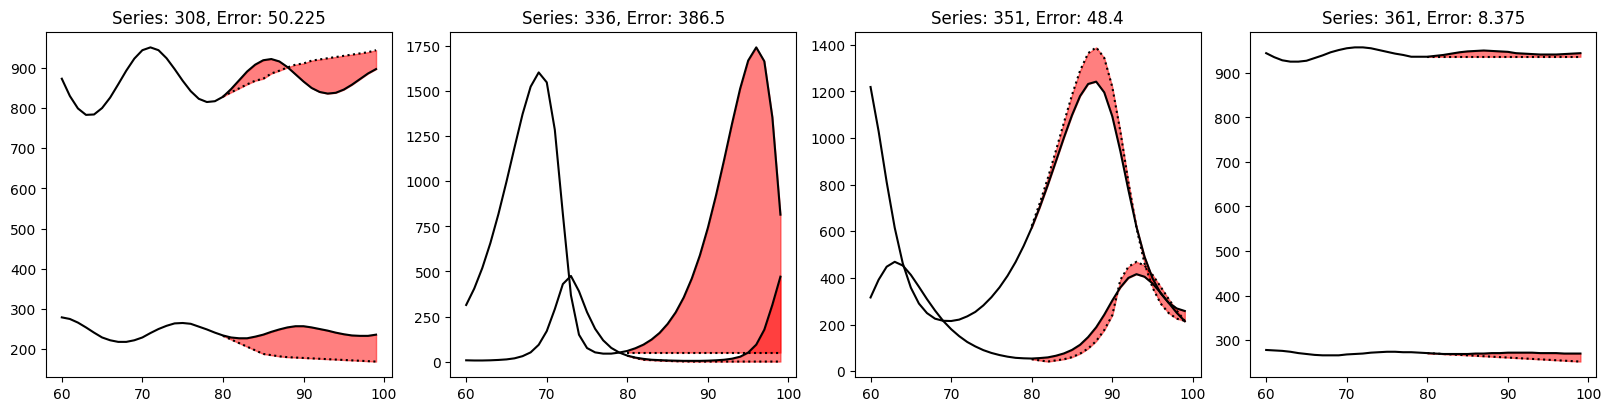

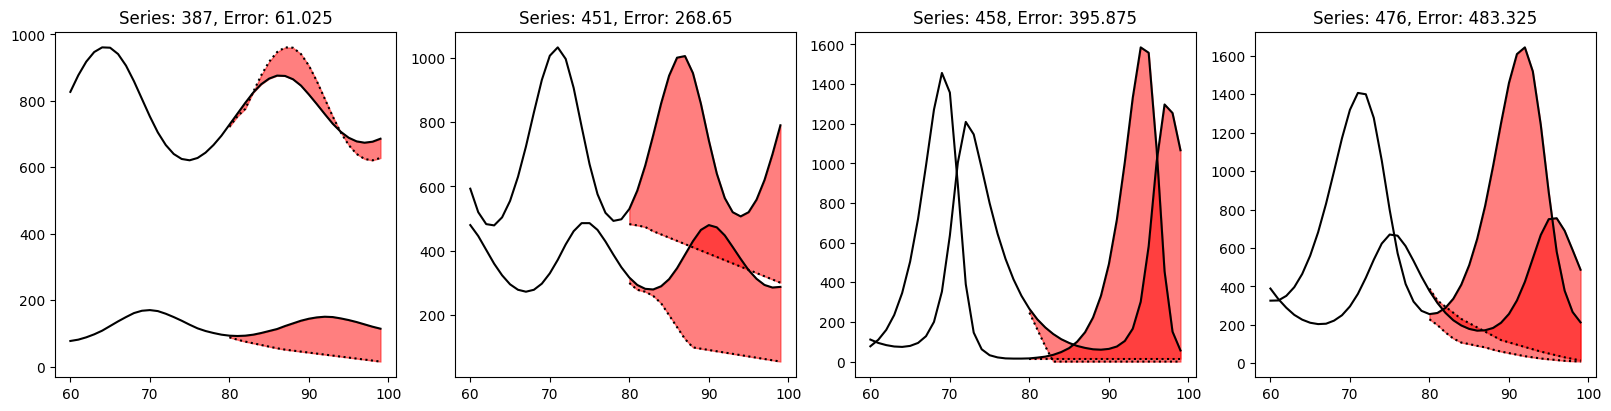

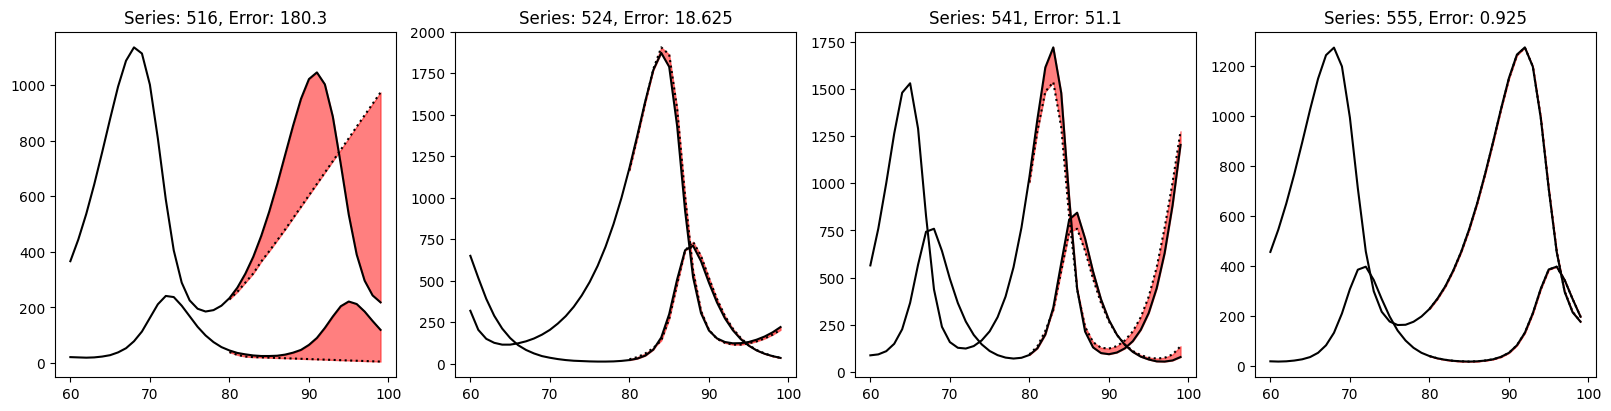

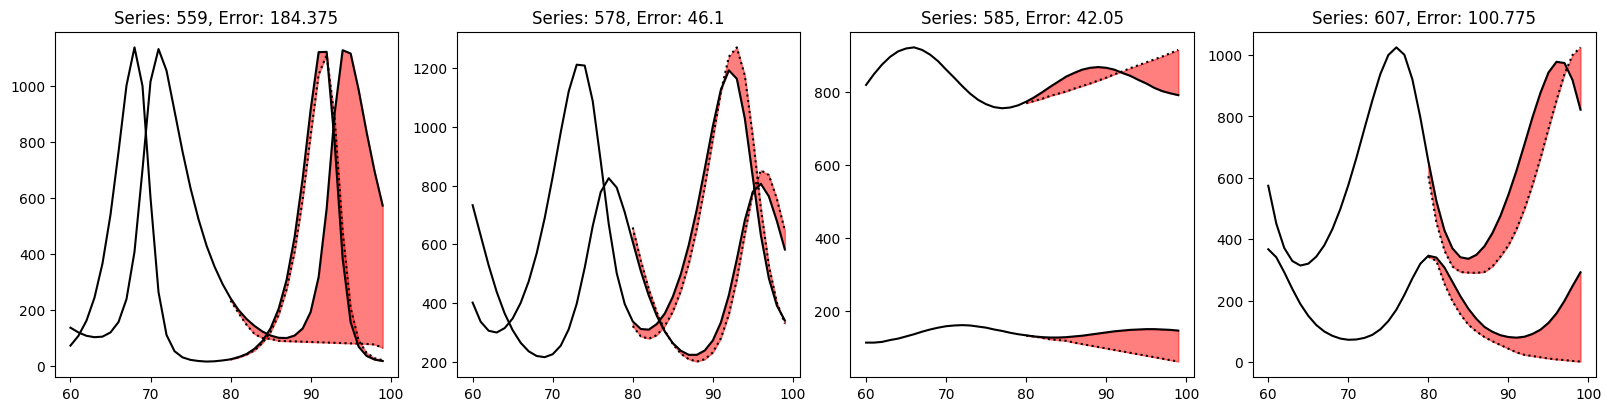

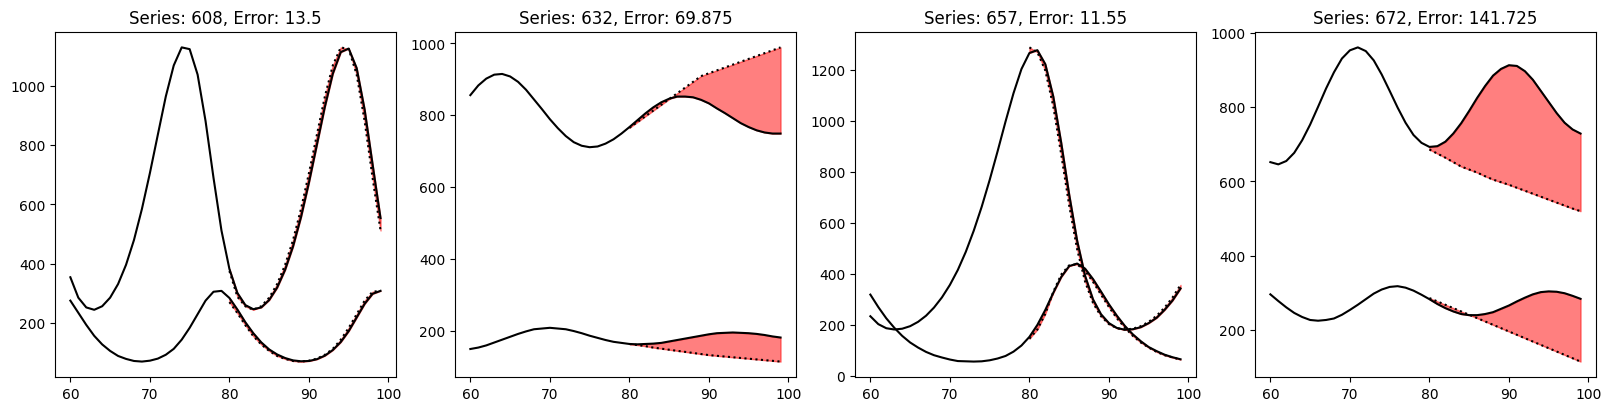

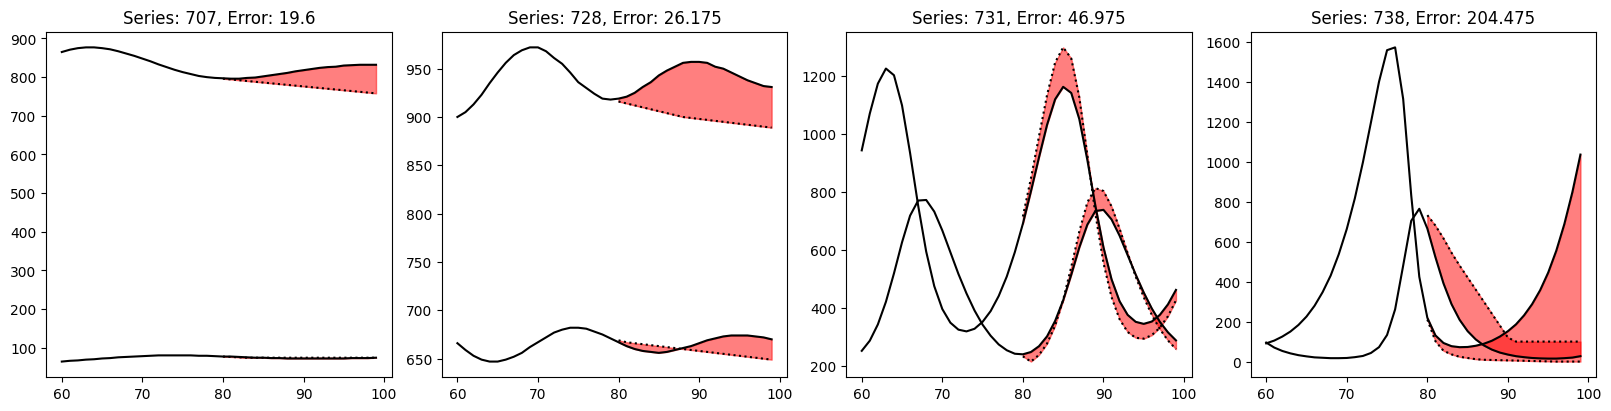

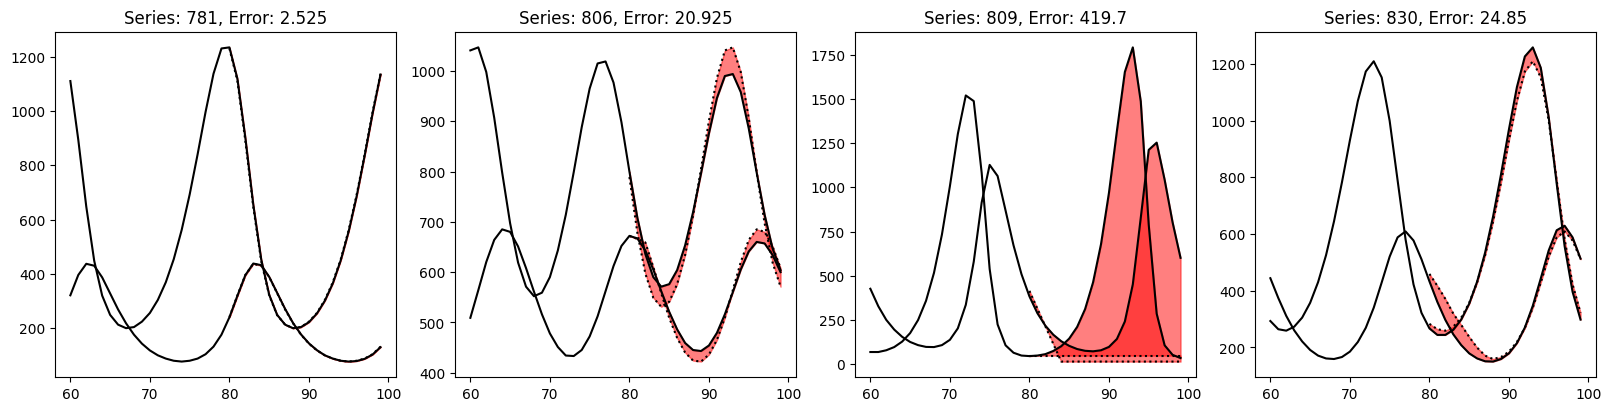

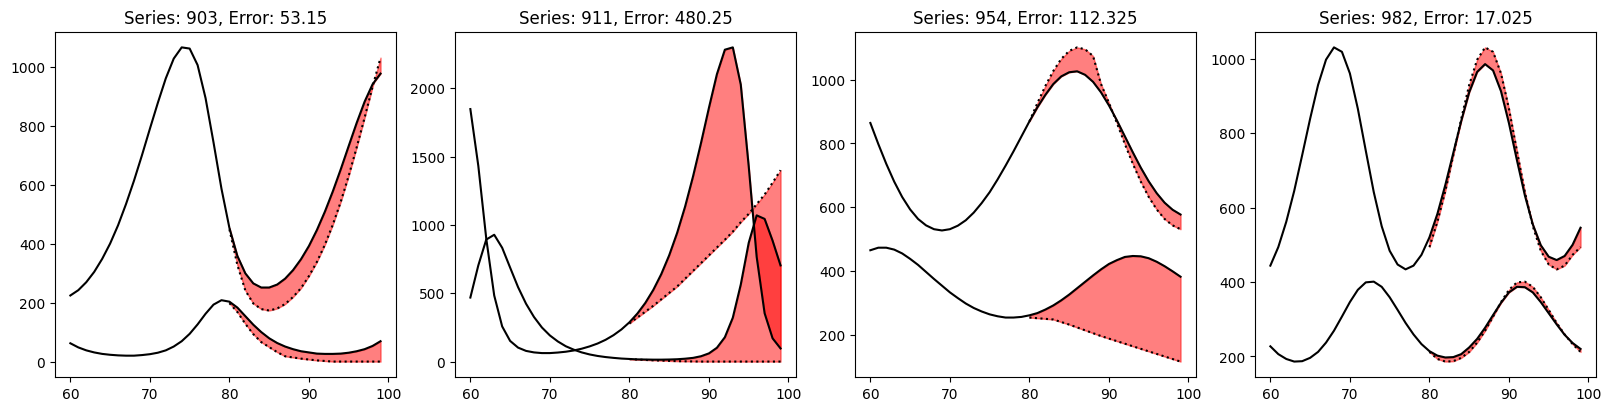

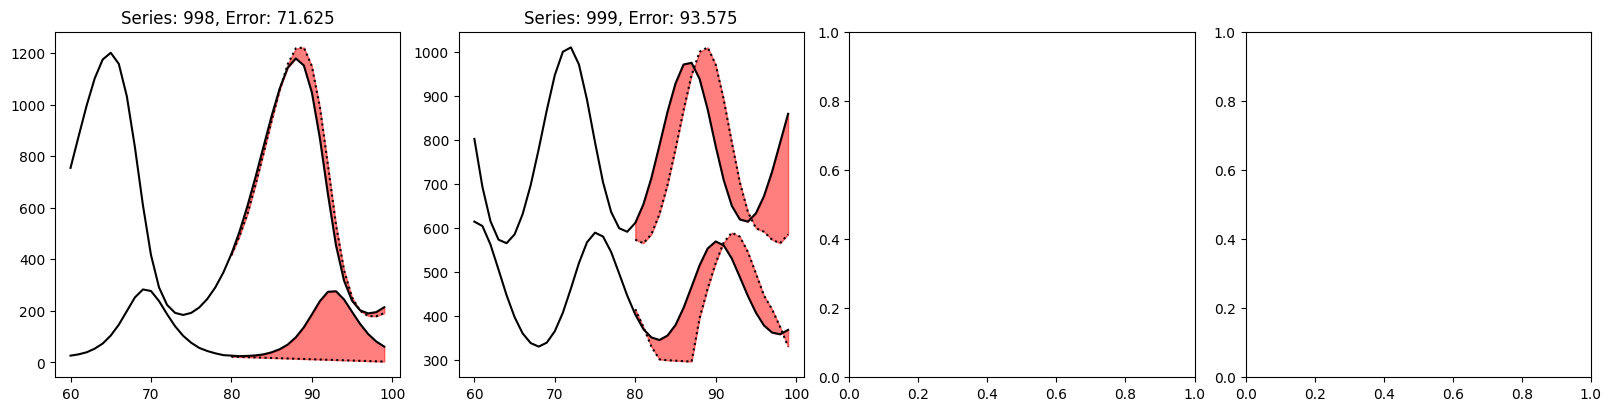

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from m2_cw.inference import visualise_forecasts

figpath = Path.cwd() / "figs"
figpath.mkdir(parents=True, exist_ok=True)

file_paths = [ file for file in Path.cwd().iterdir() if "forecast" in str(file) ]
file_path = [ file for file in file_paths if "2025-03-24" in str(file) ][0]

df = visualise_forecasts(file_path=file_path, plots_per_row=4, prefix=20, save=True, save_path=figpath)

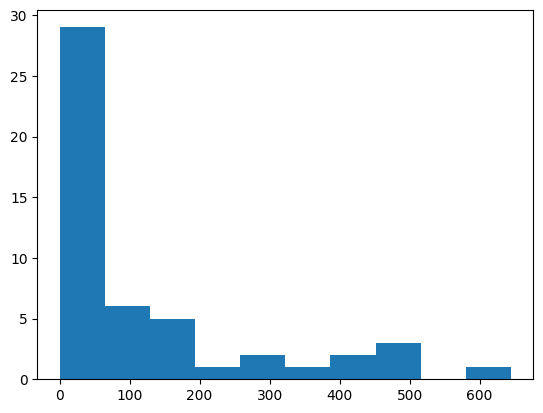

In [2]:
bestdf = df.nsmallest(30, "MAE")
worstdf = df.nlargest(20, "MAE")

plt.hist(df["MAE"], bins=10)
plt.show();

Average MAE:
 - All: 123.50
 - Best: 28.33
 - Worst: 266.25


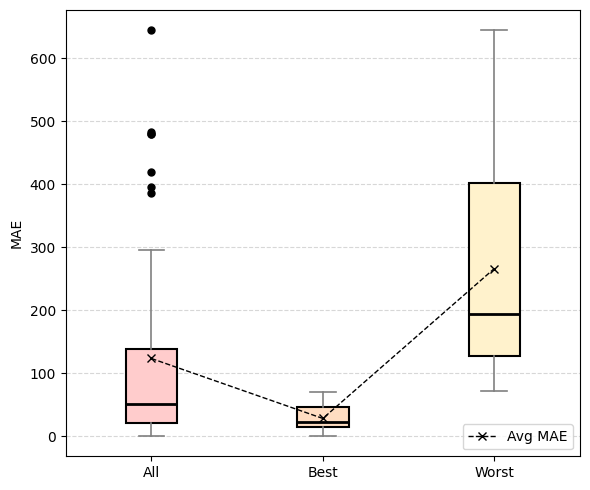

In [3]:
import matplotlib.pyplot as plt
from m2_cw.inference import boxplot_maes

all_maes = df["MAE"].to_numpy()
best_maes = bestdf["MAE"].to_numpy()
worst_maes = worstdf["MAE"].to_numpy()

data = [all_maes, best_maes, worst_maes]
labels = ["All", "Best", "Worst"]

fig, ax = boxplot_maes(data, labels)

fig.savefig(figpath / "results")

plt.show()

In [4]:
import random
import json

random.seed(10022002)

bad_ids = worstdf["series_id"].to_list()
good_ids = bestdf["series_id"].to_list()
good_ids = random.sample(good_ids, 5)

chosen_ids = {"all_ids": good_ids + bad_ids,
              "good_ids": good_ids,
              "bad_ids": bad_ids}

with open("val_ids_subset.json", "w") as f:
    json.dump(chosen_ids, f)

chosen_forecasts = []

with open("forecast_2025-03-24_14-04-11.txt", "r") as f:
    for line in f:
        idx = int(line.split(",", 1)[0])
        if idx in chosen_ids["all_ids"]:
            chosen_forecasts.append(line)

with open("val_subset_forecast.txt", "w") as f:
    for line in chosen_forecasts:
        f.write(line)
